/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  # This is added back by InteractiveShellApp.init_path()


Inference for normal mean and deviation.


Point estimate,
Average of y:  14.768
Estimated variance of y:  2.230788

Interval estimate,
95% central interval estimate for mu: [ 14.1086280745 , 15.4273719255 ]


Point estimate,
Posterior estimate for mu:  14.768
Posterior expected variance of y:  1.5841832280389785

Interval estimate,
Posterior 95% central interval estimate: [ 11.0220019209 , 18.5139980791 ]


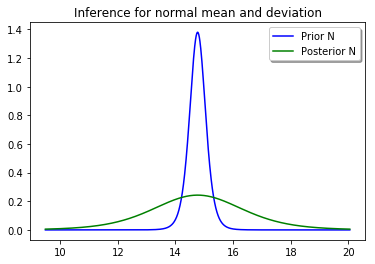

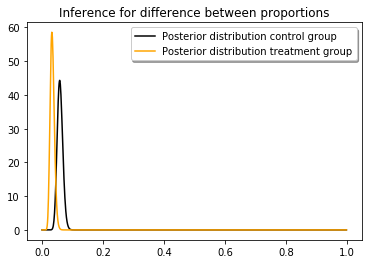

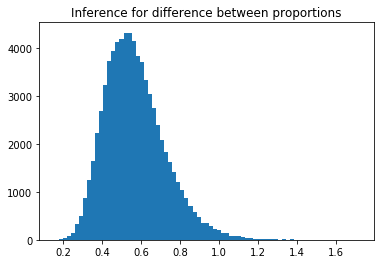



Inference for difference between proportions.


Posterior distribution control group.
Point estimate --> Posterior Beta Mean( 40 , 636 ):  0.0591715976331
Interval estimate --> [2.5%,97.5%] percentile:  [ 0.0426605478534 , 0.0780375414286 ]


Posterior distribution treatment group.
Point estimate --> Posterior Beta Mean( 23 , 659 ):  0.033724340176
Interval estimate --> [2.5%,97.5%] percentile:  [ 0.0215372506023 , 0.0485912351379 ]


In [2]:
''' 
Assignment 3
''' 
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sci 
import pandas as pd
import math as mat


y=pd.read_csv("windshieldy1.txt",sep='/n')
y=np.array(y)

#Inference for normal mean and deviation
n=len(y)
y_average=np.mean(y)
y_variance=sci.tvar(y)

print("Inference for normal mean and deviation.")
print("\n\nPoint estimate,")
print("Average of y: ", y_average)
print("Estimated variance of y: ", y_variance)
print("\nInterval estimate,")
print("95% central interval estimate for mu: [",sci.t.ppf(0.025,n-1,y_average,y_variance/n),",",sci.t.ppf(0.975,n-1,y_average,y_variance/n),"]")

y_posterior_variance=mat.sqrt(1+1/n)*mat.sqrt(y_variance)

print("\n\nPoint estimate,")
print("Posterior estimate for mu: ", y_average)
print("Posterior expected variance of y: ", y_posterior_variance)
print("\nInterval estimate,")
print("Posterior 95% central interval estimate: [",sci.t.ppf(0.025,n-1,y_average,y_posterior_variance),",",sci.t.ppf(0.975,n-1,y_average,y_posterior_variance),"]")


x=np.arange(y_average-10*mat.sqrt(y_variance/n),y_average+10*mat.sqrt(y_variance/n),0.01)


fig, ax1=plt.subplots() 
plt.plot(x,sci.t.pdf(x,n-1,y_average,y_variance/n),'blue')
plt.plot(x,sci.t.pdf(x,n-1,y_average,y_posterior_variance),'green')
plt.legend(('Prior N', 'Posterior N'),loc='upper right', shadow=True)
plt.title('Inference for normal mean and deviation')
plt.show()

#Inference for difference between proportions
y0=39
y1=22
n0=674
n1=680

alpha=1
beta=1
x=np.arange(0,1,0.001)

alpha0_posterior=alpha+y0
beta0_posterior=beta+n0-y0
alpha1_posterior=alpha+y1
beta1_posterior=beta+n1-y1

p0_prior= [sci.beta.pdf(i,alpha,beta) for i in x]
p0_posterior= [sci.beta.pdf(i,alpha0_posterior,beta0_posterior) for i in x]

p1_prior= [sci.beta.pdf(i,alpha,beta) for i in x]
p1_posterior= [sci.beta.pdf(i,alpha1_posterior,beta1_posterior) for i in x]

plt.plot(x,p0_posterior, color='black',zorder=3)
plt.plot(x,p1_posterior, color='orange',zorder=3)
plt.legend(('Posterior distribution control group', 'Posterior distribution treatment group'),loc='upper right', shadow=True)
plt.title('Inference for difference between proportions')
plt.show()

p0_random=sci.beta.rvs(alpha0_posterior, beta0_posterior, size=75000)
p1_random=sci.beta.rvs(alpha1_posterior, beta1_posterior, size=75000)
ratio=(p1_random/(1-p1_random)/(p0_random/(1-p0_random)))

per_p0_25 = np.percentile(p0_random, 2.5)
per_p0_97 = np.percentile(p0_random, 97.5)
per_p1_25 = np.percentile(p1_random, 2.5)
per_p1_97 = np.percentile(p1_random, 97.5)

plt.hist(ratio,bins=75)
plt.title('Inference for difference between proportions')
plt.show()

print("\n\nInference for difference between proportions.")
print("\n\nPosterior distribution control group.")
print("Point estimate --> Posterior Beta Mean(",alpha0_posterior,",",beta0_posterior,"): ", sci.beta.mean(alpha0_posterior, beta0_posterior)) 
print("Interval estimate --> [2.5%,97.5%] percentile: ", "[",per_p0_25,",",per_p0_97,"]")

print("\n\nPosterior distribution treatment group.")
print("Point estimate --> Posterior Beta Mean(",alpha1_posterior,",",beta1_posterior,"): ", sci.beta.mean(alpha1_posterior, beta1_posterior)) 
print("Interval estimate --> [2.5%,97.5%] percentile: ", "[",per_p1_25,",",per_p1_97,"]")

#Inference for difference between normal means
